## 1. 今日の量子コンピュータの問題

- Noisy Intermediate-Scale Quantum (NISQ) デバイス
    - 量子回路が深くなる（ゲート数が多くなる）ほど、誤差が大きくなる
    - 十分な量子ビット数ではない
- 量子デバイスは特別な量子ゲート演算しか用意されていない  
  Quantinuum H-series: , IBM Quantum:
- 超電導型量子デバイスでは特定の２量子ビット間の量子ビット演算しか用意されていない
- それぞれの量子デバイスに対して、量子ソフトウェアツールキットが用意されてる


### 1-1. TKETとは
- Quantum Software Development Kit
- TKETに実装されている回路最適化はC++で実装
- pythonモジュール　`pytket`で利用可能
- 最適化コンパイラ：　ユーザーフレンドリーな回路→量子デバイスで実行可能な回路に変換可能
    - Language-agnostic (多くの量子プログラミングフレームワーク(qiskit, Cirq, etc)をサポート)
    - Retagetable (多くの量子デバイス(IBM, Quantinuum, Amazon Braket(IonQ, Rigetti, OQC), Microsoft Azure Quantum(Quantinuu,IonQ, Rigetti) etc)をサポート)
    - Circuit Optimisation (量子計算時に生じるデバイスエラーの影響を最小化。デバイス依存＆デバイス非依存のものが実装)
    
<img src="./fig/tket1.png" width="750">



#### 参照
- [pytket ドキュメント](https://tket.quantinuum.com/api-docs/)
- [pytket ユーザーガイド](https://tket.quantinuum.com/user-guide/)
- [t|ket⟩ : A Retargetable Compiler for NISQ Devices](https://arxiv.org/abs/2003.10611)
- [TKET slack channel](https://join.slack.com/t/tketusers/shared_invite/zt-2aoan2s87-WDdZQeY2dbJQgAQE6O~3qg)

<img src="./fig/slack-qr.png" width="250">


### 1-2. pytketと拡張 pytket (python パッケージ)
Python 3.10.11で動作確認をしています。

|  パッケージ |  概要  |
| :---- | :---- |
|  pytket  |  TKETを利用するためのpython モジュール  ( available for python3.10 or higher )|
|  pytket-quantinuum  |  Quantinuumデバイス、エミュレータを利用するためのpytket-extension  |
|  pytket-qiskit  |  qiskit、IMBQデバイスを利用するためのpytket-extension  |
|  pytket-azure  |  Azure Quantumを利用するためのpytket-extension  |
|  pytket-braket  |  Amazon Braketを利用するためのpytket-extension  |
|  pytket-circ    |  Google circを利用するためのpytket-extension  |
|  pytket-qulacs  |  Qulacsシミュレータを利用するためのpytket-extension  |

<img src="./fig/tket2.png" width="850">

## 2. 量子回路を作成する　（より詳しい内容は２日目に行います）
ここでは IBMの量子デバイスやシュミレーションを利用できる`qiskit`と`TKET`でBell状態を作成する。

### 2-1. `qiskit`でBell状態を作成
$$ |\Psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$$

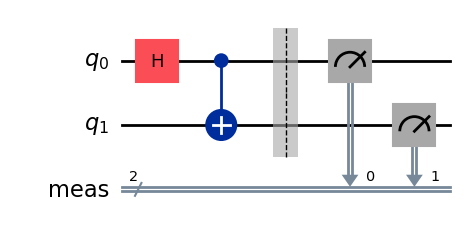

In [4]:
from qiskit import QuantumCircuit

qs_bell = QuantumCircuit(2)
qs_bell.h(0)
qs_bell.cx(0,1)
qs_bell.measure_all()

qs_bell.draw(output='mpl')

In [5]:
#from qiskit.tools.visualization import circuit_drawer
#circuit_drawer(qs_bell, output='mpl')

### 2-2. IBMが提供しているローカルシミュレータで計算

In [7]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [8]:
#Aer.backends()

In [9]:
ibm_sim = Aer.get_backend('aer_simulator')

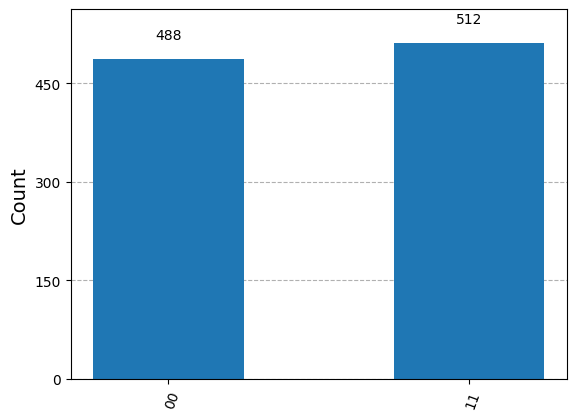

In [10]:
handle = ibm_sim.run(qs_bell, shots=1000)
counts = handle.result().get_counts()
plot_histogram(counts)

### 2-3. `TKET`でBell状態を作成

In [11]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

bell = Circuit(2)
bell.H(0).CX(0,1)
bell.measure_all()
render_circuit_jupyter(bell)

Note：TKETの可視化では、可視化した量子回路の画像ファイルを出力できる。

### 2-4. `pytket-qiskit`でTKET 量子回路をIBMのローカルシミュレータで計算

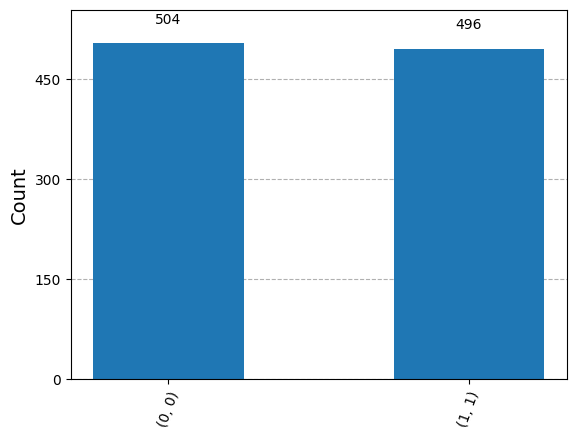

In [12]:
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()

handle = backend.process_circuit(bell, n_shots =1000)
result_counts = backend.get_result(handle).get_counts()
plot_histogram(result_counts)

### 2-5. `pytket-qiskit`でTKET 量子回路をIBMの量子デバイスで計算

IBM tokenの設定

In [14]:
path = 'key/ibm-token'
f = open(path)
ibm_token = f.read()
f.close()
#from pytket.extensions.qiskit.backends.config import set_ibmq_config
#set_ibmq_config(ibmq_api_token=ibm_token, instance=f"ibm-q/open/main")

In [15]:
my_instance=f"ibm-q/open/main"
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(channel="ibm_quantum", token=ibm_token, instance=my_instance)

In [16]:
from pytket.extensions.qiskit import IBMQBackend
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

In [17]:
device = IBMQBackend.available_devices()

In [18]:
[dev.device_name for dev in device]

['ibm_brisbane', 'ibm_kyiv', 'ibm_kyoto', 'ibm_sherbrooke']

In [19]:
# ibm_backend = AerBackend()
ibm_backend = IBMQBackend("ibm_kyoto")

### IBMの量子デバイス（ibm_kyoto）にジョブを実行

IBM Quantum device の情報  
https://quantum.ibm.com/services/resources

In [22]:
ibm_bell = ibm_backend.get_compiled_circuit(bell)
render_circuit_jupyter(ibm_bell)
render_circuit_jupyter(bell)

In [23]:
handle = ibm_backend.process_circuit(ibm_bell, n_shots =1000)
#result = ibm_backend.get_result(handle)
#counts = result.get_counts()
#plot_histogram(counts)

In [24]:
print(handle) #('cvbzcxbw5350008wvchg', 0, 2, 'null')

('cvbzcxbw5350008wvchg', 0, 2, 'null')


In [33]:
#from pytket.backends import ResultHandle
#from pytket.extensions.qiskit import IBMQBackend
#ibm_backend = IBMQBackend("ibm_kyoto")

In [34]:
#handle = "('cvbzcxbw5350008wvchg', 0, 2, 'null')"
#result = ibm_backend.get_result(handle)
#counts = result.get_counts()
#print(counts)
#from qiskit.visualization import plot_histogram
#plot_histogram(counts)

### 2-5. `pytket-quantinuum`でTKET 量子回路をQuantinuum エミュレータで計算

In [25]:
from pytket.extensions.quantinuum import QuantinuumAPIOffline
api = QuantinuumAPIOffline()

In [26]:
from pytket.extensions.quantinuum import QuantinuumBackend
QuantinuumBackend.available_devices(api_handler = api)

[BackendInfo(name='QuantinuumBackend', device_name='H1-1', version='0.37.0', architecture=<tket::FullyConnected, nodes=20>, gate_set={<OpType.Measure: 66>, <OpType.Reset: 68>, <OpType.Rz: 36>, <OpType.PhasedX: 71>, <OpType.Barrier: 8>, <OpType.ZZMax: 73>, <OpType.ZZPhase: 76>, <OpType.ClassicalExpBox: 109>, <OpType.WASM: 14>, <OpType.SetBits: 15>, <OpType.CopyBits: 16>, <OpType.RangePredicate: 17>, <OpType.ExplicitPredicate: 18>, <OpType.ExplicitModifier: 19>, <OpType.MultiBit: 20>, <OpType.TK2: 44>}, n_cl_reg=120, supports_fast_feedforward=True, supports_reset=True, supports_midcircuit_measurement=True, all_node_gate_errors=None, all_edge_gate_errors=None, all_readout_errors=None, averaged_node_gate_errors=None, averaged_edge_gate_errors=None, averaged_readout_errors=None, misc={'wasm': True, 'batching': True, 'benchmarks': {'qv': {'date': '2024-04-04', 'value': 1048576.0}}, 'max_classical_register_width': 32, 'syntax_checker': 'H1-1SC', 'n_gate_zones': '5', 'noise_specs': {'date': '2

In [27]:
quantinuum_backend = QuantinuumBackend(device_name ='H1-1LE',api_handler = api)
quantinuum_bell = quantinuum_backend.get_compiled_circuit(bell)
render_circuit_jupyter(quantinuum_bell)
render_circuit_jupyter(bell)

In [28]:
handle = quantinuum_backend.process_circuit(quantinuum_bell, n_shots=1000)
result = quantinuum_backend.get_result(handle)

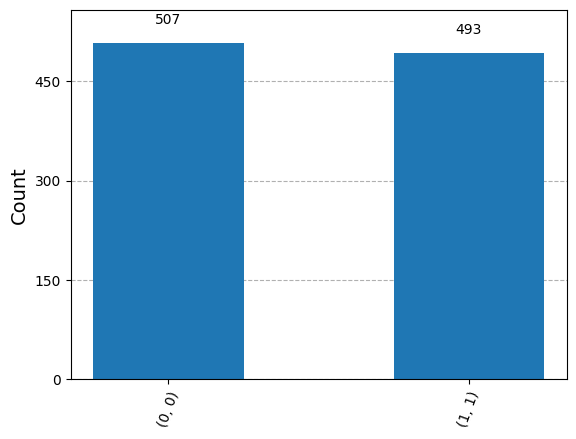

In [29]:
counts = result.get_counts()
plot_histogram(counts)

### 2-6. `pytket-qulacs`でTKET 量子回路をQulacsシミュレータで計算

In [30]:
from pytket.extensions.qulacs import QulacsBackend
qulacs_backend = QulacsBackend()

In [31]:
qulacs_backend.backend_info

BackendInfo(name='QulacsBackend', device_name=None, version='0.37.0', architecture=None, gate_set={<OpType.Measure: 66>, <OpType.Barrier: 8>, <OpType.Z: 22>, <OpType.X: 23>, <OpType.Y: 24>, <OpType.S: 25>, <OpType.Sdg: 26>, <OpType.T: 27>, <OpType.Tdg: 28>, <OpType.H: 33>, <OpType.Rx: 34>, <OpType.Ry: 35>, <OpType.Rz: 36>, <OpType.U3: 37>, <OpType.U2: 38>, <OpType.U1: 39>, <OpType.CX: 45>, <OpType.CZ: 47>, <OpType.SWAP: 62>}, n_cl_reg=None, supports_fast_feedforward=False, supports_reset=False, supports_midcircuit_measurement=False, all_node_gate_errors=None, all_edge_gate_errors=None, all_readout_errors=None, averaged_node_gate_errors=None, averaged_edge_gate_errors=None, averaged_readout_errors=None, misc={})

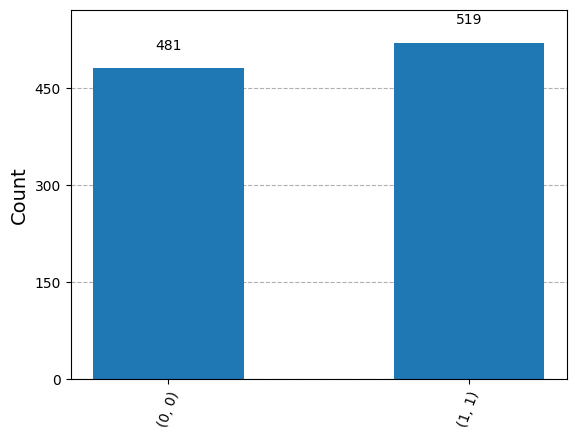

In [32]:
handle = qulacs_backend.process_circuit(bell, n_shots =1000)
result_counts = qulacs_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

### GPU上でQulacsを利用している場合にも対応している


In [42]:
#from pytket.extensions.qulacs import QulacsGPUBackend
#qualcs_backend = QulacsGPUBackend()

#handle = qulacs_backend.process_circuit(bell, n_shots =1000)
#result_counts = qulacs_backend.get_result(handle).get_counts()
#plot_histogram(result_counts)

詳しくは
https://tket.quantinuum.com/extensions/pytket-qulacs/
を参照ください

### 2-7. `pytket-azure`でTKET 量子回路をMicrosoft Azure Quantum(有料)にある量子デバイスで計算が可能
本講演では詳細は割愛致しますが、Azure Quantum上でTKETをご利用になられたい方は下記のページを参考に設定をしてください。  
https://tket.quantinuum.com/extensions/pytket-azure/
または  
米澤(yasuyoshi.yonezawa@quantinuum.com)までご連絡ください。

In [35]:
#!pip install pytket-azure

In [36]:
# Azure Qauntum上の量子デバイスまたはシミュレータを利用する
#from pytket.extensions.azure import AzureBackend

In [3]:
# Quantinuum H1 device
# azure_backend = AzureBackend(target_name='quantinuum.qpu.h1-1',resourceId=resource_id,location = location)
# Quantinuum H1 emulator
# azure_backend = AzureBackend(target_name='quantinuum.sim.h1-1e',resourceId=resource_id,location = location)
# Quantinuum H1 Syntax Checker
# azure_backend = AzureBackend(target_name='quantinuum.sim.h1-1sc',resourceId=resource_id,location = location)

# IonQ device"
# azure_backend = AzureBackend(target_name='ionq.qpu',resourceId=resource_id,location = location)
# azure_backend = AzureBackend(target_name='ionq.qpu.aria-1',resourceId=resource_id,location = location)
# IonQ simulator
# azure_backend = AzureBackend(target_name='ionq.simulator',resourceId=resource_id,location = location)

In [39]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter
bell = Circuit(2)
bell.H(0).CX(0,1)
bell.measure_all()
render_circuit_jupyter(bell)

In [40]:
#azure_bell = azure_backend.get_compiled_circuit(bell)
#render_circuit_jupyter(azure_bell)

In [41]:
#result = azure_backend.run_circuit(azure_bell, n_shots=100)

In [42]:
#counts = result.get_counts()
#counts

### 2-8. `pytket-braket`でTKET 量子回路をBraketシミュレータやAmazon Braket(有料)にある量子デバイスで計算
本講演では詳細は割愛致しますが、Amazon Bracket上でTKETをご利用になられたい方は下記のページを参考に設定をしてください。  
https://tket.quantinuum.com/extensions/pytket-braket/  
または  
米澤(yasuyoshi.yonezawa@quantinuum.com)までご連絡ください。

#### A. ローカル環境からBraketにアクセスされている方は、keyフォルダーのaws-keyのアクセスキー等の情報を入力し下記を実行してください

In [43]:
#path = 'key/aws-key'
#f = open(path)
#aws_access_key_id, aws_secret_access_key, s3_name, bucket_key= [s.strip() for s in f.readlines()]
#f.close()

In [44]:
#import boto3
#from braket.aws import AwsSession
#boto_session = boto3.Session(
#    aws_access_key_id= aws_access_key_id,
#    aws_secret_access_key= aws_secret_access_key,
#    region_name= 'us-east-1'
##    region_name= 'us-west-1'
##    region_name= 'eu-west-2'
#)
## us-east-1: IonQ, Simulators
## us-west-1: Rigetti, Simulators
## eu-west-2: Lucy, Simulators
##
#aws_session = AwsSession(boto_session=boto_session)

#### B. Sagemaker StudioからBraketにアクセスされている方は下記を実行してください。

In [ ]:
#import boto3
#from braket.aws import AwsSession
#boto_session = boto3.Session(
#    aws_access_key_id= aws_access_key_id,
#    aws_secret_access_key= aws_secret_access_key,
#    region_name= 'us-east-1'
#    region_name= 'us-west-1'
#    region_name= 'eu-west-2'
#)
# us-east-1: IonQ, Simulators
# us-west-1: Rigetti, Simulators
# eu-west-2: Lucy, Simulators
#
#aws_session = AwsSession(boto_session=boto_session)

In [ ]:
#device = aws_session.search_devices()

In [ ]:
#[dev for dev in device if dev["deviceStatus"]!='RETIRED']

In [43]:
# backend の選択
from pytket.extensions.braket import BraketBackend

# ionQ   arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1, region: us-east-1
# aws_backend = BraketBackend(device='Aria-1',region = 'us-east-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'ionq', aws_session=aws_session)
# ionQ   arn:aws:braket:us-east-1::device/qpu/ionq/Aria-2, region: us-east-1
# aws_backend = BraketBackend(device='Aria-2',region = 'us-east-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'ionq', aws_session=aws_session)
# ionQ   arn:aws:braket:us-east-1::device/qpu/ionq/Forte-1, region: us-east-1
# aws_backend = BraketBackend(device='Forte-1',region = 'us-east-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'ionq', aws_session=aws_session)
# ionQ   arn:aws:braket:us-east-1::device/qpu/ionq/Harmony, region: us-east-1
# aws_backend = BraketBackend(device='Harmony',region = 'us-east-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'ionq', aws_session=aws_session)
# Aspen-M-3   arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1 #Aspen-M-1, region: us-west-1
# aws_backend = BraketBackend(device='Aspen-M-3',region = 'us-west-1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'rigetti', aws_session=aws_session)
# Oxford Lucy   arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy #Lucy, region: eu-west-2
# aws_backend = BraketBackend(device='Lucy',region = 'eu-west-2', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'qpu', provider = 'oqc', aws_session=aws_session)
# SV1    sim_arn = 'arn:aws:braket:::device/quantum-simulator/amazon/sv1'     #SV1, region:
# aws_backend = BraketBackend(device='sv1', s3_bucket=s3_name , s3_folder = bucket_key, aws_session=aws_session)
# TN1   sim_arn = 'arn:aws:braket:::device/quantum-simulator/amazon/tn1'    #TN1, region: us-west-2, us-east-1
# aws_backend = BraketBackend(device='tn1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'quantum-simulator', provider = 'amazon', aws_session=aws_session)
# DM1   sim_arn = 'arn:aws:braket:::device/quantum-simulator/amazon/dm1'    #DM1, region: 
# aws_backend = BraketBackend(device='dm1', s3_bucket=s3_name , s3_folder = bucket_key, device_type = 'quantum-simulator', provider = 'amazon', aws_session=aws_session)
# Local sv1 simulator
#aws_backend = BraketBackend(local = True)

In [44]:
#aws_backend.backend_info

In [46]:
#from pytket import Circuit
#from pytket.circuit.display import render_circuit_jupyter
# Bell状態の作成
#bell = Circuit(2)
#bell.H(0).CX(0,1)
#bell.measure_all()
#render_circuit_jupyter(bell)

# backend に用意されているゲートで量子回路を表現
#aws_bell = aws_backend.get_compiled_circuit(bell)
#render_circuit_jupyter(aws_bell)

In [48]:
#aws_handle = aws_backend.process_circuit(aws_bell, n_shots =100)
#aws_result = aws_backend.get_result(aws_handle)
#aws_counts = aws_result.get_counts()
#print(aws_counts)
#from qiskit.visualization import plot_histogram
#plot_histogram(aws_result.get_counts())

In [49]:
#aws_handle = aws_backend.process_circuit(bell, n_shots =100)
#aws_result = aws_backend.get_result(aws_handle)
#aws_counts = aws_result.get_counts()
#print(aws_counts)
#from qiskit.visualization import plot_histogram
#plot_histogram(aws_result.get_counts())

## 3. 量子回路の最適化
量子計算時に生じるデバイスエラーの影響を最小化。  
デバイス非依存の最適化とデバイス依存の最適化（実はすでに上記で利用）がある。  
詳２くは三日目にご紹介します。

### 3-1. `PauliSquash` 関数を利用した、量子回路の最適化
TKETには量子回路を最適化する様々な機能が用意されている。
ここで`PauliSquash` 関数を利用した回路の最適化（デバイス非依存）を行う。
`PauliSquash` 関数：Pauli ゲートとCliffordゲートで表現された量子回路を出力）

ランダムな量子回路を作成し、回路の深さとCXの深さを数える。

In [50]:
from pytket.pauli import Pauli
from pytket.circuit import PauliExpBox, fresh_symbol, OpType
from pytket.passes import DecomposeBoxes
box = PauliExpBox([Pauli.I, Pauli.Z, Pauli.X, Pauli.Y], fresh_symbol('tm'))
from pytket.utils import Graph
import numpy as np

def get_random_pauli_gadgets(n_qubits, n_pauli_gadgets, max_entangle):
    """ """
    paulis = [Pauli.I, Pauli.X, Pauli.Y, Pauli.Z]
    circ = Circuit(n_qubits)
    for i in range(n_pauli_gadgets):
        ls_paulis = [np.random.choice(paulis) for k in range(max_entangle)]
        if ls_paulis.count(Pauli.Y) % 2 == 0:
            continue
        if len(ls_paulis) - ls_paulis.count(Pauli.I) <= 1:
            continue
        qubits = np.random.choice(
            [i for i in range(n_qubits)], size=max_entangle, replace=False
        )
        box = PauliExpBox(ls_paulis, fresh_symbol('a'))
        circ.add_pauliexpbox(box, sorted(qubits))
    DecomposeBoxes().apply(circ)
    return circ

ランダムな量子ゲート（Pauliガジェット）を含んだ量子回路を作成

In [51]:
circ = get_random_pauli_gadgets(
    n_qubits=8, n_pauli_gadgets=300, max_entangle=5
)
print('Circuit depth: ', circ.depth())
print('CX depth: ', circ.depth_by_type(OpType.CX))
render_circuit_jupyter(circ)

Circuit depth:  853
CX depth:  531


`PauliSquash` 関数を使って、量子回路の最適化

In [52]:
# Circuit optimization by using compiler passes.
from pytket.passes import PauliSquash
circx = circ.copy()
PauliSquash().apply(circx)
#FullPeepholeOptimise().apply(circx)
print('Circuit depth: ', circx.depth())
print('CX depth: ', circx.depth_by_type(OpType.CX))
render_circuit_jupyter(circx)

Circuit depth:  744
CX depth:  494


## 4. 量子回路の変換
pytketでは
- qiskitで記述した量子回路(`qiskit.QuantumCircuit`)からTKETの量子回路のクラスに変換が可能
- TKETで記述した量子回路からqiskitの量子回路(`qiskit.QuantumCircuit`)のクラスに変換が可能
- TKETで記述した量子回路と他の量子プログラミング言語(一部)での量子回路の交換が可能

参照：[pytket-extensions](https://tket.quantinuum.com/api-docs/extensions.html) 

### 4-1. `qiskit`の量子回路から`TKET`の量子回路に変換

In [56]:
from pytket.extensions.qiskit import qiskit_to_tk

In [57]:
bell_2 = qiskit_to_tk(qs_bell)
bell_2

[H q[0]; CX q[0], q[1]; Barrier q[0], q[1]; Measure q[0] --> meas[0]; Measure q[1] --> meas[1]; ]

In [58]:
render_circuit_jupyter(bell_2)

### 4-2. `TKET`の量子回路から`qiskit`の量子回路に変換

In [59]:
from pytket.extensions.qiskit import tk_to_qiskit

In [60]:
qs_bell_2 = tk_to_qiskit(bell)
qs_bell_2

In [61]:
qs_bell_2.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

弊社Quantinuumのご紹介
- Quantinuum ウェブサイト（ 英語 ）： https://www.quantinuum.com/
- Quantinuum K.K. ウェブサイト（ 日本語 ）： https://quantinuum.co.jp/
- 各種技術詳細（ 英語 ）： https://www.quantinuum.com/products
- ニュース（ 日本語 ）： https://quantinuum.co.jp/news/  
- X（ 日本語 ）： https://twitter.com/quantinuum_jp?lang=en
- Quantinuum K.K.主催の勉強会（ 日本語 ）： https://quantinuum.connpass.com/  
- 採用情報（ 英語 ）：https://www.quantinuum.com/careers
- TKET slack channel：[TKET slack channel](https://join.slack.com/t/tketusers/shared_invite/zt-2aoan2s87-WDdZQeY2dbJQgAQE6O~3qg)

<img src="./fig/slack-qr.png" width="250">
